In [5]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json as js

In [6]:
pwd

'/Users/mingyuanma/Desktop'

In [7]:
before = pd.read_csv("combined1.csv")
before

ResponseId  round  tick  orderId  taskId  taskTicks  workerId  \
0       R_0uOsLe6BeLnUee5      1     1        1       1          2         0   
1       R_0uOsLe6BeLnUee5      1     1        2       1          2         1   
2       R_0uOsLe6BeLnUee5      1     1        0       0          0         0   
3       R_0uOsLe6BeLnUee5      1     2        3       1          2         2   
4       R_0uOsLe6BeLnUee5      1     2        0       0          0         0   
...                   ...    ...   ...      ...     ...        ...       ...   
100561  R_zTlbYwl8ijcujhn      6    33        0       0          0         0   
100562  R_zTlbYwl8ijcujhn      6    33        0       0          0         0   
100563  R_zTlbYwl8ijcujhn      6    34        4       3          2         1   
100564  R_zTlbYwl8ijcujhn      6    34        0       0          0         0   
100565  R_zTlbYwl8ijcujhn      6    34        0       0          0         0   

        workerTicks  label  
0                 0      3  
1                 0      3  
2                 0      3  
3                 0      3  
4                 0      3  
...             ...    ...  
100561            0      1  
100562            0      1  
100563            0      1  
100564            0      1  
100565            0      1  

[100566 rows x 9 columns]

In [8]:
after = pd.read_csv("combined2.csv")
after

ResponseId  round  tick  orderId  taskId  taskTicks  workerId  \
0       R_0HBxBV8U696D9QJ      1     1        1       1          2         0   
1       R_0HBxBV8U696D9QJ      1     1        2       1          2         1   
2       R_0HBxBV8U696D9QJ      1     1        3       1          2         2   
3       R_0HBxBV8U696D9QJ      1     2        0       0          0         0   
4       R_0HBxBV8U696D9QJ      1     2        0       0          0         0   
...                   ...    ...   ...      ...     ...        ...       ...   
141757  R_zZQIbE0LFD13yRX      6    37        0       0          0         0   
141758  R_zZQIbE0LFD13yRX      6    37        0       0          0         0   
141759  R_zZQIbE0LFD13yRX      6    38        4       3          2         1   
141760  R_zZQIbE0LFD13yRX      6    38        0       0          0         0   
141761  R_zZQIbE0LFD13yRX      6    38        0       0          0         0   

        workerTicks  label  
0                 0      2  
1                 0      2  
2                 0      2  
3                 0      2  
4                 0      2  
...             ...    ...  
141757            0      3  
141758            0      3  
141759            0      3  
141760            0      3  
141761            0      3  

[141762 rows x 9 columns]

# chi-square testing

In [178]:
from scipy.stats import chi2_contingency
from collections import Counter

def chisquare(array1, array2, count=True):
    if not count:
        data = [array1, array2]
        stat, p, dof, expected = chi2_contingency(data)
        
    else:
        c1, c2 = Counter(array1), Counter(array2)
        before_dis, after_dis = [], []
        for i in set(c1).union(set(c2)):
            before_dis.append(c1[i])
            after_dis.append(c2[i])
        print(before_dis)
        print(after_dis)
        data = [before_dis, after_dis]
        stat, p, dof, expected = chi2_contingency(data)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('difference between the two distributions (reject H0)')
    else:
        print('no difference between the two distributions (H0 holds true)')

# Distribution of label before and after

In [18]:
d1 = before.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[0])
d2 = after.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[0])

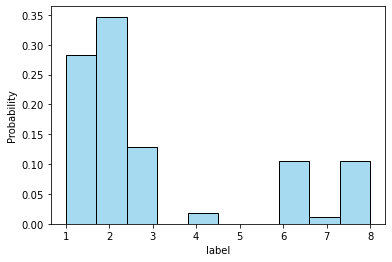

In [64]:
sns.histplot(data=d1, x="label", stat="probability", color="skyblue");

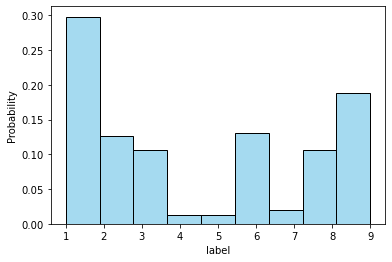

In [65]:
sns.histplot(data=d2, x="label", stat="probability", color="skyblue");

### Chi-Square Testing

In [179]:
chisquare(d1["label"], d2["label"])

[48, 59, 22, 3, 0, 18, 2, 18, 0]
[73, 31, 26, 3, 3, 32, 5, 26, 46]
p value is 1.0415585870358675e-09
difference between the two distributions (reject H0)


# Analysis of Compliance

In [268]:
def compliance(df):
    ids = []
    rounds = []
    server = []
    label = []
    for player in set(np.array(df["ResponseId"])):
        for i in np.arange(1,7):
            tem = df[(df["ResponseId"] == player) & (df["round"] == i)]
            if len(tem) != 0: # no response there
                ids.append(player)
                rounds.append(i)
                l = df[(df["ResponseId"] == player)]["label"].iloc[0]
                label.append(l)
                if i <= 2:
                    num = sum((tem["workerId"] == 2) & (tem["taskId"] == 1))
                else:
                    num = sum((tem["workerId"] == 1) & (tem["taskId"] == 1))
                server.append(num)
            else:
                print(player, i)
    d = {
        "ResponseId": ids,
        "round": rounds,
        "numServerCook": server,
        "label": label
    }
    return pd.DataFrame(d)

In [269]:
before_compliance = compliance(before)

In [271]:
after_compliance = compliance(after)

In [272]:
before_compliance

ResponseId  round  numServerCook  label
0     R_2ykqjCa36BsYwZF      1              1      2
1     R_2ykqjCa36BsYwZF      2              0      2
2     R_2ykqjCa36BsYwZF      3              2      2
3     R_2ykqjCa36BsYwZF      4              2      2
4     R_2ykqjCa36BsYwZF      5              3      2
...                 ...    ...            ...    ...
1015  R_3HXrkaEHfDcmalh      2              0      1
1016  R_3HXrkaEHfDcmalh      3              2      1
1017  R_3HXrkaEHfDcmalh      4              3      1
1018  R_3HXrkaEHfDcmalh      5              3      1
1019  R_3HXrkaEHfDcmalh      6              2      1

[1020 rows x 4 columns]

In [273]:
after_compliance

ResponseId  round  numServerCook  label
0     R_31N6XgNWAmSoPju      1              2      3
1     R_31N6XgNWAmSoPju      2              2      3
2     R_31N6XgNWAmSoPju      3              2      3
3     R_31N6XgNWAmSoPju      4              2      3
4     R_31N6XgNWAmSoPju      5              2      3
...                 ...    ...            ...    ...
1465  R_eX50rUyYLBeIOkN      2              1      1
1466  R_eX50rUyYLBeIOkN      3              2      1
1467  R_eX50rUyYLBeIOkN      4              3      1
1468  R_eX50rUyYLBeIOkN      5              3      1
1469  R_eX50rUyYLBeIOkN      6              2      1

[1470 rows x 4 columns]

## group by rounds

In [275]:
round_before = before_compliance.groupby("round").agg(np.average).loc[:,["numServerCook"]]
round_before

numServerCook
round               
1           1.141176
2           0.994118
3           2.552941
4           2.670588
5           2.617647
6           2.500000

In [276]:
round_after = after_compliance.groupby("round").agg(np.average).loc[:,["numServerCook"]]
round_after

numServerCook
round               
1           1.204082
2           1.061224
3           2.408163
4           2.232653
5           2.163265
6           2.044898

In [278]:
a = np.array(round_before["numServerCook"])

In [279]:
b = np.array(round_after["numServerCook"])

### chi-square testing

In [280]:
chisquare(a, b, count=False)

p value is 0.999958667113752
no difference between the two distributions (H0 holds true)


## group by tip

In [281]:
tip_before = before_compliance.groupby("label", as_index=False).agg(np.average).loc[:,["label","numServerCook"]]
tip_before

label  numServerCook
0      1       2.142361
1      2       2.033898
2      3       2.007576
3      4       1.944444
4      6       2.157407
5      7       2.416667
6      8       2.055556

In [282]:
tip_after = after_compliance.groupby("label", as_index=False).agg(np.average).loc[:,["label","numServerCook"]]
tip_after

label  numServerCook
0      1       1.805936
1      2       1.795699
2      3       2.102564
3      4       1.500000
4      5       1.555556
5      6       1.833333
6      7       2.333333
7      8       2.108974
8      9       1.681159

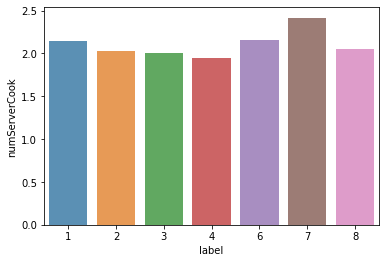

In [284]:
sns.barplot(x="label", y="numServerCook", data=tip_before, alpha=0.8);

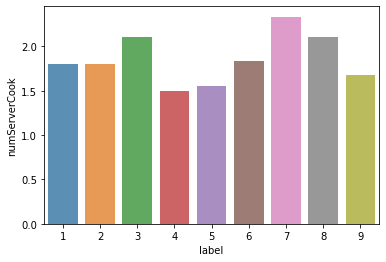

In [285]:
sns.barplot(x="label", y="numServerCook", data=tip_after, alpha=0.8);

### chi-square testing

In [286]:
np.array(tip_before["numServerCook"])

array([2.14236111, 2.03389831, 2.00757576, 1.94444444, 2.15740741,
       2.41666667, 2.05555556])

In [287]:
tb = np.array([2.14236111, 2.03389831, 2.00757576, 1.94444444, 0, 2.15740741, 2.41666667, 2.05555556, 0])
chisquare(np.array(tb),
         np.array(tip_after["numServerCook"]),count=False)

p value is 0.9170727120567413
no difference between the two distributions (H0 holds true)


## Testing Aversion Distribution

In [322]:
ave_before = before_compliance[(before_compliance["numServerCook"] >= 3) 
                               | (before_compliance["numServerCook"] == 0)].groupby(
                                "label").count().loc[:,["round"]]
ave_before = ave_before.rename(columns = {"round":"numAversion"})

In [323]:
ave_after = after_compliance[(after_compliance["numServerCook"] >= 3) 
                               | (after_compliance["numServerCook"] == 0)].groupby(
                                "label").count().loc[:,["round"]]
ave_after = ave_after.rename(columns = {"round":"numAversion"})

In [324]:
def counting(df):
    count = []
    for i in np.arange(1,10):
        cou = len(df[df["label"] == i])
        count.append(cou)
    return count

In [325]:
counting(before_compliance), counting(after_compliance)
[_ for _ in counting(before_compliance) if _]

[288, 354, 132, 18, 108, 12, 108]

In [326]:
ave_before['total_num_label'] = [_ for _ in counting(before_compliance) if _]
ave_before["proportion_aversion"] = ave_before["numAversion"] / ave_before['total_num_label']
ave_before["proportion_label"] = ave_before['total_num_label'] / before_compliance.shape[0]
ave_before

numAversion  total_num_label  proportion_aversion  proportion_label
label                                                                     
1               84              288             0.291667          0.282353
2              123              354             0.347458          0.347059
3               53              132             0.401515          0.129412
4                6               18             0.333333          0.017647
6               33              108             0.305556          0.105882
7               10               12             0.833333          0.011765
8               42              108             0.388889          0.105882

In [327]:
ave_after['total_num_label'] = counting(after_compliance)
ave_after["proportion_aversion"] = ave_after["numAversion"] / ave_after['total_num_label']
ave_after["proportion_label"] = ave_after['total_num_label'] / after_compliance.shape[0]
ave_after

numAversion  total_num_label  proportion_aversion  proportion_label
label                                                                     
1              103              438             0.235160          0.297959
2               52              186             0.279570          0.126531
3               53              156             0.339744          0.106122
4                2               18             0.111111          0.012245
5                5               18             0.277778          0.012245
6               33              192             0.171875          0.130612
7               19               30             0.633333          0.020408
8               50              156             0.320513          0.106122
9               45              276             0.163043          0.187755

## Testing Compliance Distribution

In [337]:
com_before = before_compliance[before_compliance["numServerCook"] ==2].groupby(
                                "label").count().loc[:,["round"]]
com_before = com_before.rename(columns = {"round":"numCompliance"})

In [330]:
com_after = after_compliance[after_compliance["numServerCook"] ==2].groupby(
                                "label").count().loc[:,["round"]]
com_after = com_after.rename(columns = {"round":"numCompliance"})
com_after

numCompliance
label               
1                216
2                 82
3                 66
4                  8
5                  9
6                109
7                  4
8                 61
9                118

In [335]:
com_before['total_num_label'] = [288, 354, 132, 18, 108, 108]
com_before["proportion_compliance"] = com_before["numCompliance"] / com_before['total_num_label']
com_before["proportion_label"] = com_before['total_num_label'] / before_compliance.shape[0]
com_before

numCompliance  total_num_label  proportion_compliance  proportion_label
label                                                                         
1                150              288               0.520833          0.282353
2                164              354               0.463277          0.347059
3                 58              132               0.439394          0.129412
4                  8               18               0.444444          0.017647
6                 48              108               0.444444          0.105882
8                 32              108               0.296296          0.105882

In [338]:
com_after['total_num_label'] = counting(after_compliance)
com_after["proportion_compliance"] = com_after["numCompliance"] / com_after['total_num_label']
com_after["proportion_label"] = com_after['total_num_label'] / after_compliance.shape[0]
com_after

numCompliance  total_num_label  proportion_compliance  proportion_label
label                                                                         
1                216              438               0.493151          0.297959
2                 82              186               0.440860          0.126531
3                 66              156               0.423077          0.106122
4                  8               18               0.444444          0.012245
5                  9               18               0.500000          0.012245
6                109              192               0.567708          0.130612
7                  4               30               0.133333          0.020408
8                 61              156               0.391026          0.106122
9                118              276               0.427536          0.187755